In [1]:
import proplot as pplt
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import pickle
import fitsio as fio
%matplotlib inline

In [2]:
with open('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/som_weight_test/som_weight_25pc.pickle', 'rb') as handle:
    res = pickle.load(handle)
# d_som = fio.read('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/som_weight_test/som_25pc_catalog.fits')

In [7]:
res.keys()

dict_keys(['n', 'e1', 'e2', 'e1_2', 'e2_2', 's2n', 'tr', 'gmr', 'rmi', 'imz', 'pt', 'mf', 'magr', '1p', 'num_1p', '1m', 'num_1m', '2p', 'num_2p', '2m', 'num_2m'])

In [15]:
d_som.dtype

dtype([('mdet_step', '<U7'), ('wmom_g_1', '>f8'), ('wmom_g_2', '>f8'), ('som_ind', '>i8'), ('w', '>f8'), ('s2n', '>f8'), ('size_ratio', '>f8')])

In [3]:
# compute response
R11 = (res['1p']/res['num_1p'] - res['1m']/res['num_1m'])/0.02
R22 = (res['2p']/res['num_2p'] - res['2m']/res['num_2m'])/0.02
R = (R11+R22)/2

<ipython-input-4-c791743ec846>:53: ProplotWarning: fig.tight_layout() has no effect on proplot figures. Proplot uses its own tight layout algorithm that is activated by default. To disable it, set pplt.rc['subplots.tight'] to False or pass tight=False to pplt.subplots(). For details, see fig.auto_layout().
  plt.tight_layout()


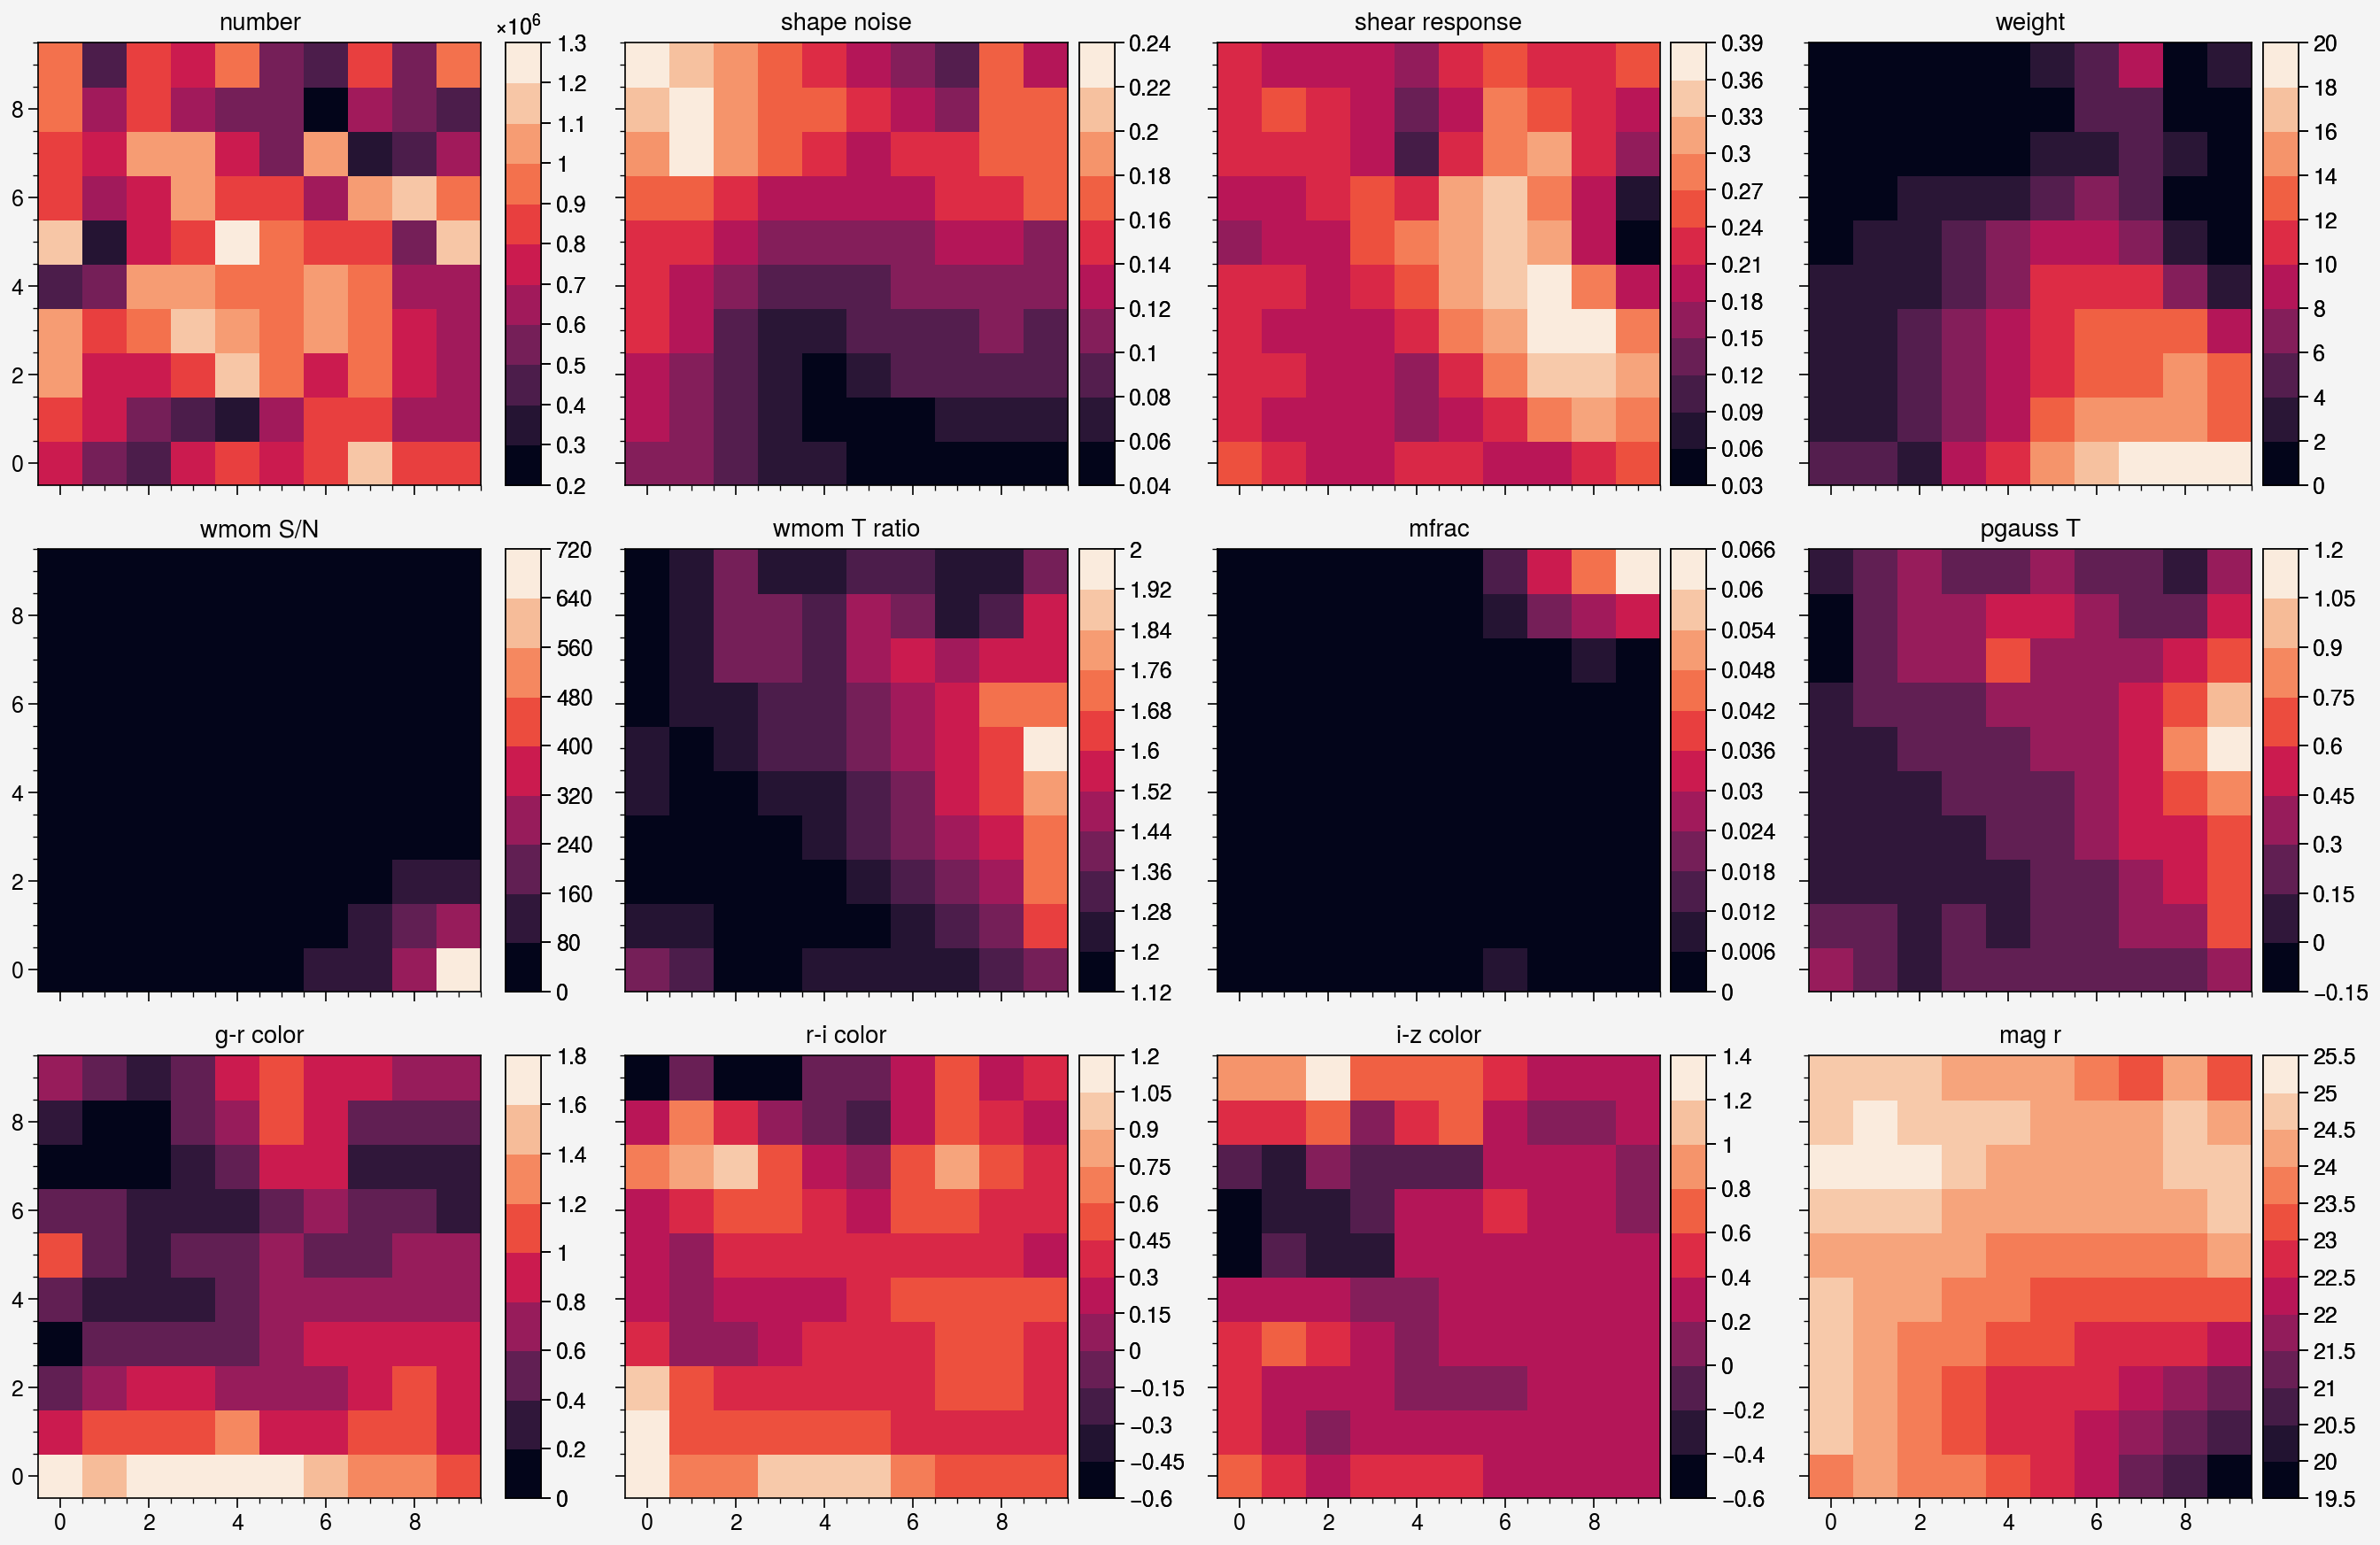

In [4]:
fig, axs = pplt.subplots(nrows=3, ncols=4)

som_shape = (10, 10)
c = axs[0, 0].pcolormesh(res['n'].reshape(*som_shape), cmap="rocket")
axs[0, 0].colorbar(c, loc="r")
axs[0, 0].set_title("number")

sn = np.sqrt(res['e1_2']/res['n'] - (res['e1']/res['n'])**2)
c = axs[0, 1].pcolormesh(sn.reshape(*som_shape), cmap="rocket")
axs[0, 1].colorbar(c, loc="r")
axs[0, 1].set_title("shape noise")

c = axs[0, 2].pcolormesh(R.reshape(*som_shape), cmap="rocket")
axs[0, 2].colorbar(c, loc="r")
axs[0, 2].set_title("shear response")

c = axs[0, 3].pcolormesh((R**2/sn**2).reshape(*som_shape), cmap="rocket")
axs[0, 3].colorbar(c, loc="r")
axs[0, 3].set_title("weight")

c = axs[1, 0].pcolormesh(10**(res['s2n']/res['n']).reshape(*som_shape), cmap="rocket")
axs[1, 0].colorbar(c, loc="r")
axs[1, 0].set_title("wmom S/N")

c = axs[1, 1].pcolormesh((res['tr']/res['n']).reshape(*som_shape), cmap="rocket")
axs[1, 1].colorbar(c, loc="r")
axs[1, 1].set_title("wmom T ratio")

c = axs[1, 2].pcolormesh((res['mf']/res['n']).reshape(*som_shape), cmap="rocket")
axs[1, 2].colorbar(c, loc="r")
axs[1, 2].set_title("mfrac")

c = axs[1, 3].pcolormesh((res['pt']/res['n']).reshape(*som_shape), cmap="rocket")
axs[1, 3].colorbar(c, loc="r")
axs[1, 3].set_title("pgauss T")

c = axs[2, 0].pcolormesh((res['gmr']/res['n']).reshape(*som_shape), cmap="rocket")
axs[2, 0].colorbar(c, loc="r")
axs[2, 0].set_title("g-r color")

c = axs[2, 1].pcolormesh((res['rmi']/res['n']).reshape(*som_shape), cmap="rocket")
axs[2, 1].colorbar(c, loc="r")
axs[2, 1].set_title("r-i color")

c = axs[2, 2].pcolormesh((res['imz']/res['n']).reshape(*som_shape), cmap="rocket")
axs[2, 2].colorbar(c, loc="r")
axs[2, 2].set_title("i-z color")

c = axs[2, 3].pcolormesh((res['magr']/res['n']).reshape(*som_shape), cmap="rocket")
axs[2, 3].colorbar(c, loc="r")
axs[2, 3].set_title("mag r")

plt.tight_layout()
# plt.savefig('../vf_figures/final_v2/som_weight_10pc.pdf', bbox_inches='tight')

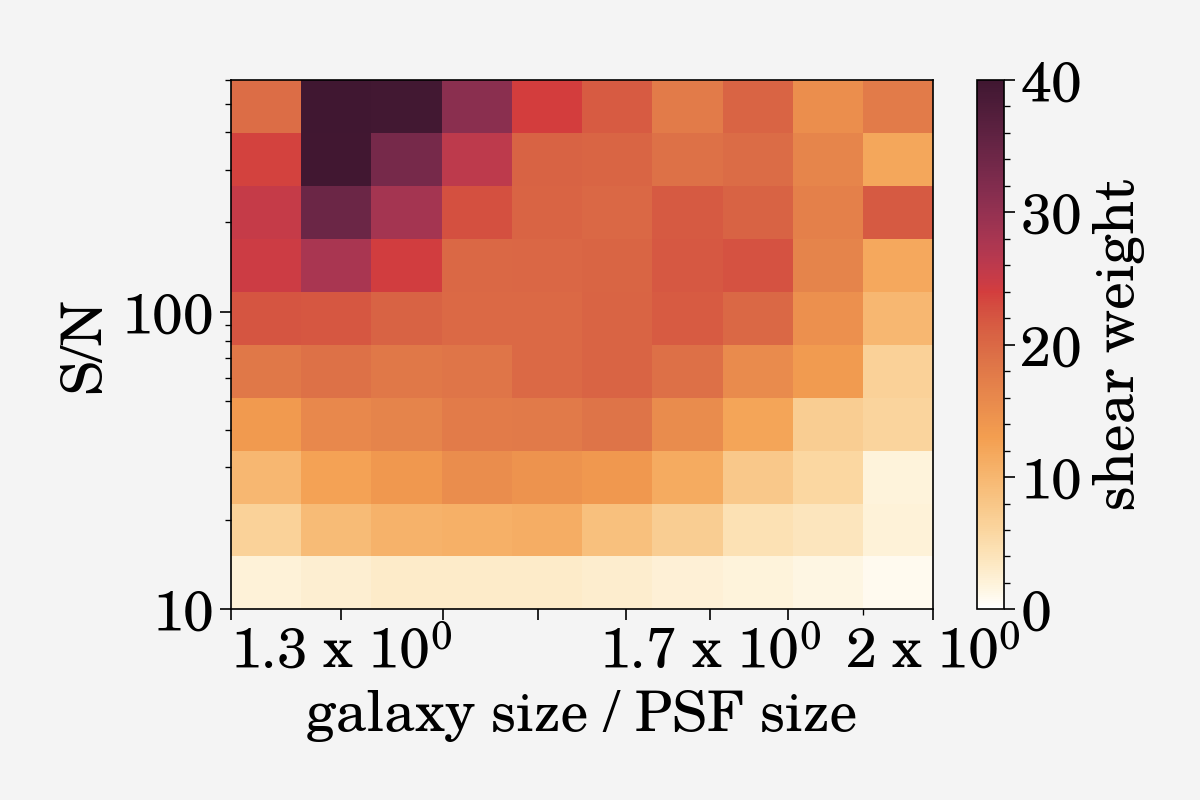

In [5]:
with open('/global/cscratch1/sd/myamamot/des-y6-analysis/y6_measurement/som_weight_test/inverse_variance_weight_som_test_10steps.pickle', 'rb') as handle:
    res_sn = pickle.load(handle)
matplotlib.use('Agg')
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=False)
matplotlib.rc('font', family='serif')

xedges = res_sn['xedges']
yedges = res_sn['yedges']
count_all = res_sn['count']
new_meanes = res_sn['meanes']
new_response = res_sn['response']
new_shearweight = res_sn['weight']

fig,ax=plt.subplots(nrows=1, ncols=1, figsize=(6,4))
X, Y = np.meshgrid(yedges, xedges)
im = ax.pcolormesh(X, Y, new_shearweight, vmin=0, vmax=40)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("S/N")
ax.set_xlabel("galaxy size / PSF size")
# im.axes.get_xaxis().get_ticklabels()[3].set_visible(False)
fig.colorbar(im, ax=ax, label="shear weight")

# plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# plt.minorticks_off() 
ax.set_xticks(np.array([1.2,1.3,1.4,1.5,1.6,1.7,1.8,2.]))
ax.set_xticklabels(np.array(['', r'1.3 x $10^{0}$','','','',r'1.7 x $10^{0}$','',r'2 x $10^{0}$']))
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

# Check the variance of S/N in individual cells

In [6]:
nsoms = 100
dat = np.zeros(nsoms, dtype=[('n', 'i8'), ('nsom', 'i8'), ('s2n', 'f8'), ('s2n_sig', 'f8'), ('size_ratio', 'f8'), ('size_ratio_sig', 'f8')])
for i in range(nsoms):
    d_cell = d_som[d_som['som_ind'] == i]
    dat['n'][i] = len(d_cell)
    dat['nsom'][i] = i
    dat['s2n'][i] = np.mean(np.log10(d_cell['s2n']))
    dat['s2n_sig'][i] = np.std(np.log10(d_cell['s2n']))
    dat['size_ratio'][i] = np.mean(d_cell['size_ratio'])
    dat['size_ratio_sig'][i] = np.std(d_cell['size_ratio'])

NameError: name 'd_som' is not defined

(0.6, 3.0)

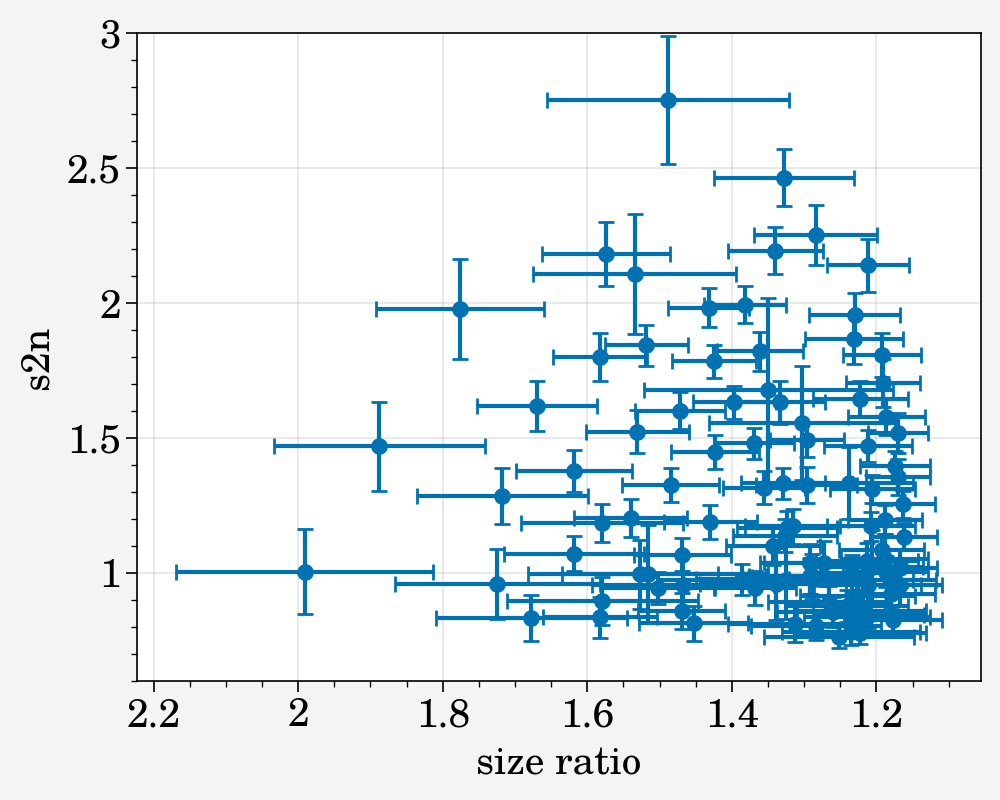

In [50]:
matplotlib.rcParams.update({'font.size': 14,})
fig,ax=pplt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax.errorbar(dat['size_ratio'], dat['s2n'], xerr=dat['size_ratio_sig'], yerr=dat['s2n_sig'], fmt='o', markersize=5)
ax.set_xlabel('size ratio')
ax.set_ylabel('s2n')
ax.set_ylim(0.6,3)
